In [1]:
"""
reference : https://www.kaggle.com/maksimeren/covid-19-literature-clustering
"""
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

import numpy as np
import pandas as pd

import json
import glob
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

SEED = 123456789

In [2]:
with open("covid_data\\covid_19_2.pkl", 'rb') as f:
    df = pickle.load(f)

In [3]:
def vectorize(text, maxx_features):
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)
    return X
text = df['processed_text'].values
X = vectorize(text, 2 ** 12)

In [4]:
# PCA
pca = PCA(n_components=0.95, random_state=SEED)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(10000, 2170)

In [5]:
# kmeans
k = 20
kmeans = KMeans(n_clusters=k, random_state=SEED)
y_pred = kmeans.fit_predict(X_reduced)
df['y'] = y_pred

In [6]:
# t-SNE
tsne = TSNE(verbose=1, perplexity=100, random_state=SEED)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 10000 samples in 16.388s...
[t-SNE] Computed neighbors for 10000 samples in 765.886s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.375621
[t-SNE] KL divergence after 50 iterations with early exaggeration: 82.477722
[t-SNE] KL divergence after 1000 iterations: 1.855097


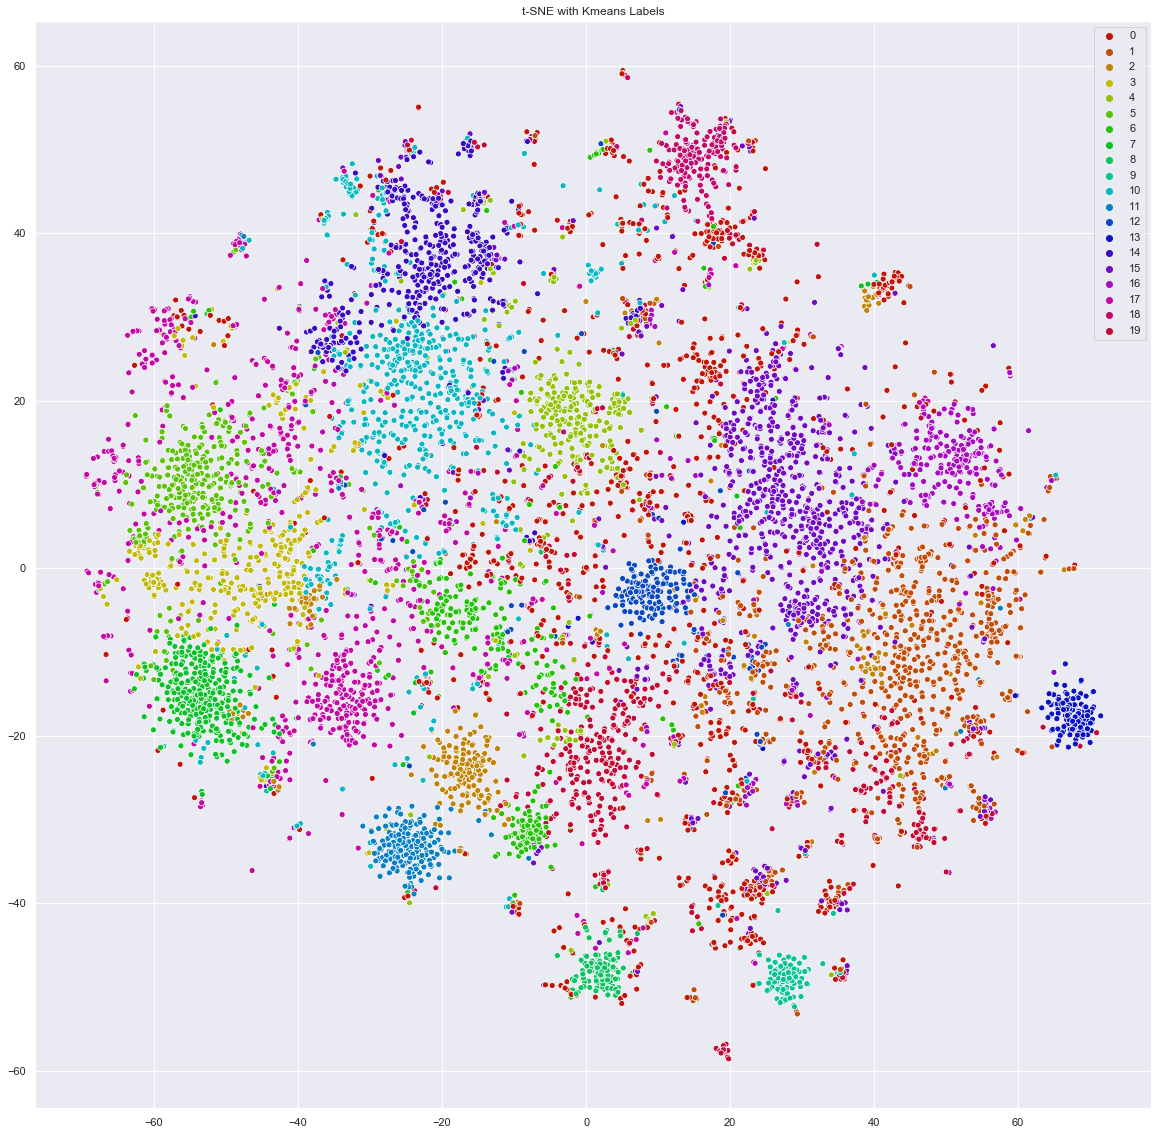

In [8]:
# sns settings
sns.set(rc={'figure.figsize':(20,20)})

# colors
palette = sns.hls_palette(20, l=.4, s=.9)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.savefig("cluster_tsne.png")
plt.show()